In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data Cleaning

In [65]:
df = pd.read_csv("./Spotify Most Streamed Songs.csv")
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37,1,0,144,A,Major,60,24,39,57,0,8,3,https://i.scdn.co/image/ab67616d0000b2730f5397...
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6,https://i.scdn.co/image/ab67616d0000b273e0b60c...
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,7,0,0,92,C#,Major,80,81,67,4,0,8,6,Not Found
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5,Not Found


The following code will:
- Group the different columns into better recognizable sections
- rename ambigious column names (**streams => spotify_streams**)
- dropped a column that gave no meaningful information (**cover_url**)
- make the mode column be in 0 an 1 for better data analysis (**Major = 0, Minor = 1**)
- make the key column be from 0 to 12 for better data analysis (**A is 0, G# = 12, and NaN = NaN**)

In [66]:
df = df.rename(columns={'streams': 'spotify_streams'})
df = df.drop('cover_url', axis=1)
df = df.set_index(['track_name', 'artist(s)_name'])
# Defining groups of 
date_cols = ['released_year', 'released_month', 'released_day']
spotify_col = ['in_spotify_playlists', 'in_spotify_charts', 'spotify_streams']
apple_col = ['in_apple_playlists', 'in_apple_charts']
deezer_col = ['in_deezer_playlists', 'in_deezer_charts']
musical_info_col = ['bpm', 'key', 'mode']

In [67]:
df['mode'] = df['mode'].map({'Major': 0, 'Minor': 1}) 
mode_dict = {0: 'Major', 1: 'Minor'}

In [68]:
df["key"] = df['key'].map({
    'A': 0,
    'A#': 1,
    'B': 2,
    'C': 3,
    'C#': 4,
    'D': 5,
    'D#': 6,
    'E': 7,
    'F': 8,
    'F#': 9,
    'G': 10,
    'G#': 11,
    np.nan: np.nan
})
key_dict = {
    0 : 'A',
    1 : 'A#',
    2 : 'B',
    3 : 'C',
    4 : 'C#',
    5 : 'D',
    6 : 'D#',
    7 : 'E',
    8 : 'F',
    9 : 'F#',
    10 : 'G',
    11 : 'G#',
    np.nan : np.nan
}

In [69]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,858.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,5.904429,0.422875,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,3.559818,0.494275,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,0.000000,0.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,4.000000,0.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,6.000000,0.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,9.000000,1.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,11.000000,1.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [70]:
df

,,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,spotify_streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
track_name,artist(s)_name,,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,2.0,0,80,89,83,31,0,8,4
LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,4.0,0,71,61,74,7,0,10,4
vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,8.0,0,51,32,53,17,0,31,6
Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,0.0,0,55,58,72,11,0,11,15
WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,0.0,1,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37,1,0,144,0.0,0,60,24,39,57,0,8,3
Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8,0,0,166,9.0,0,42,7,24,83,1,12,6
A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,7,0,0,92,4.0,0,80,81,67,4,0,8,6


# Data Analysis

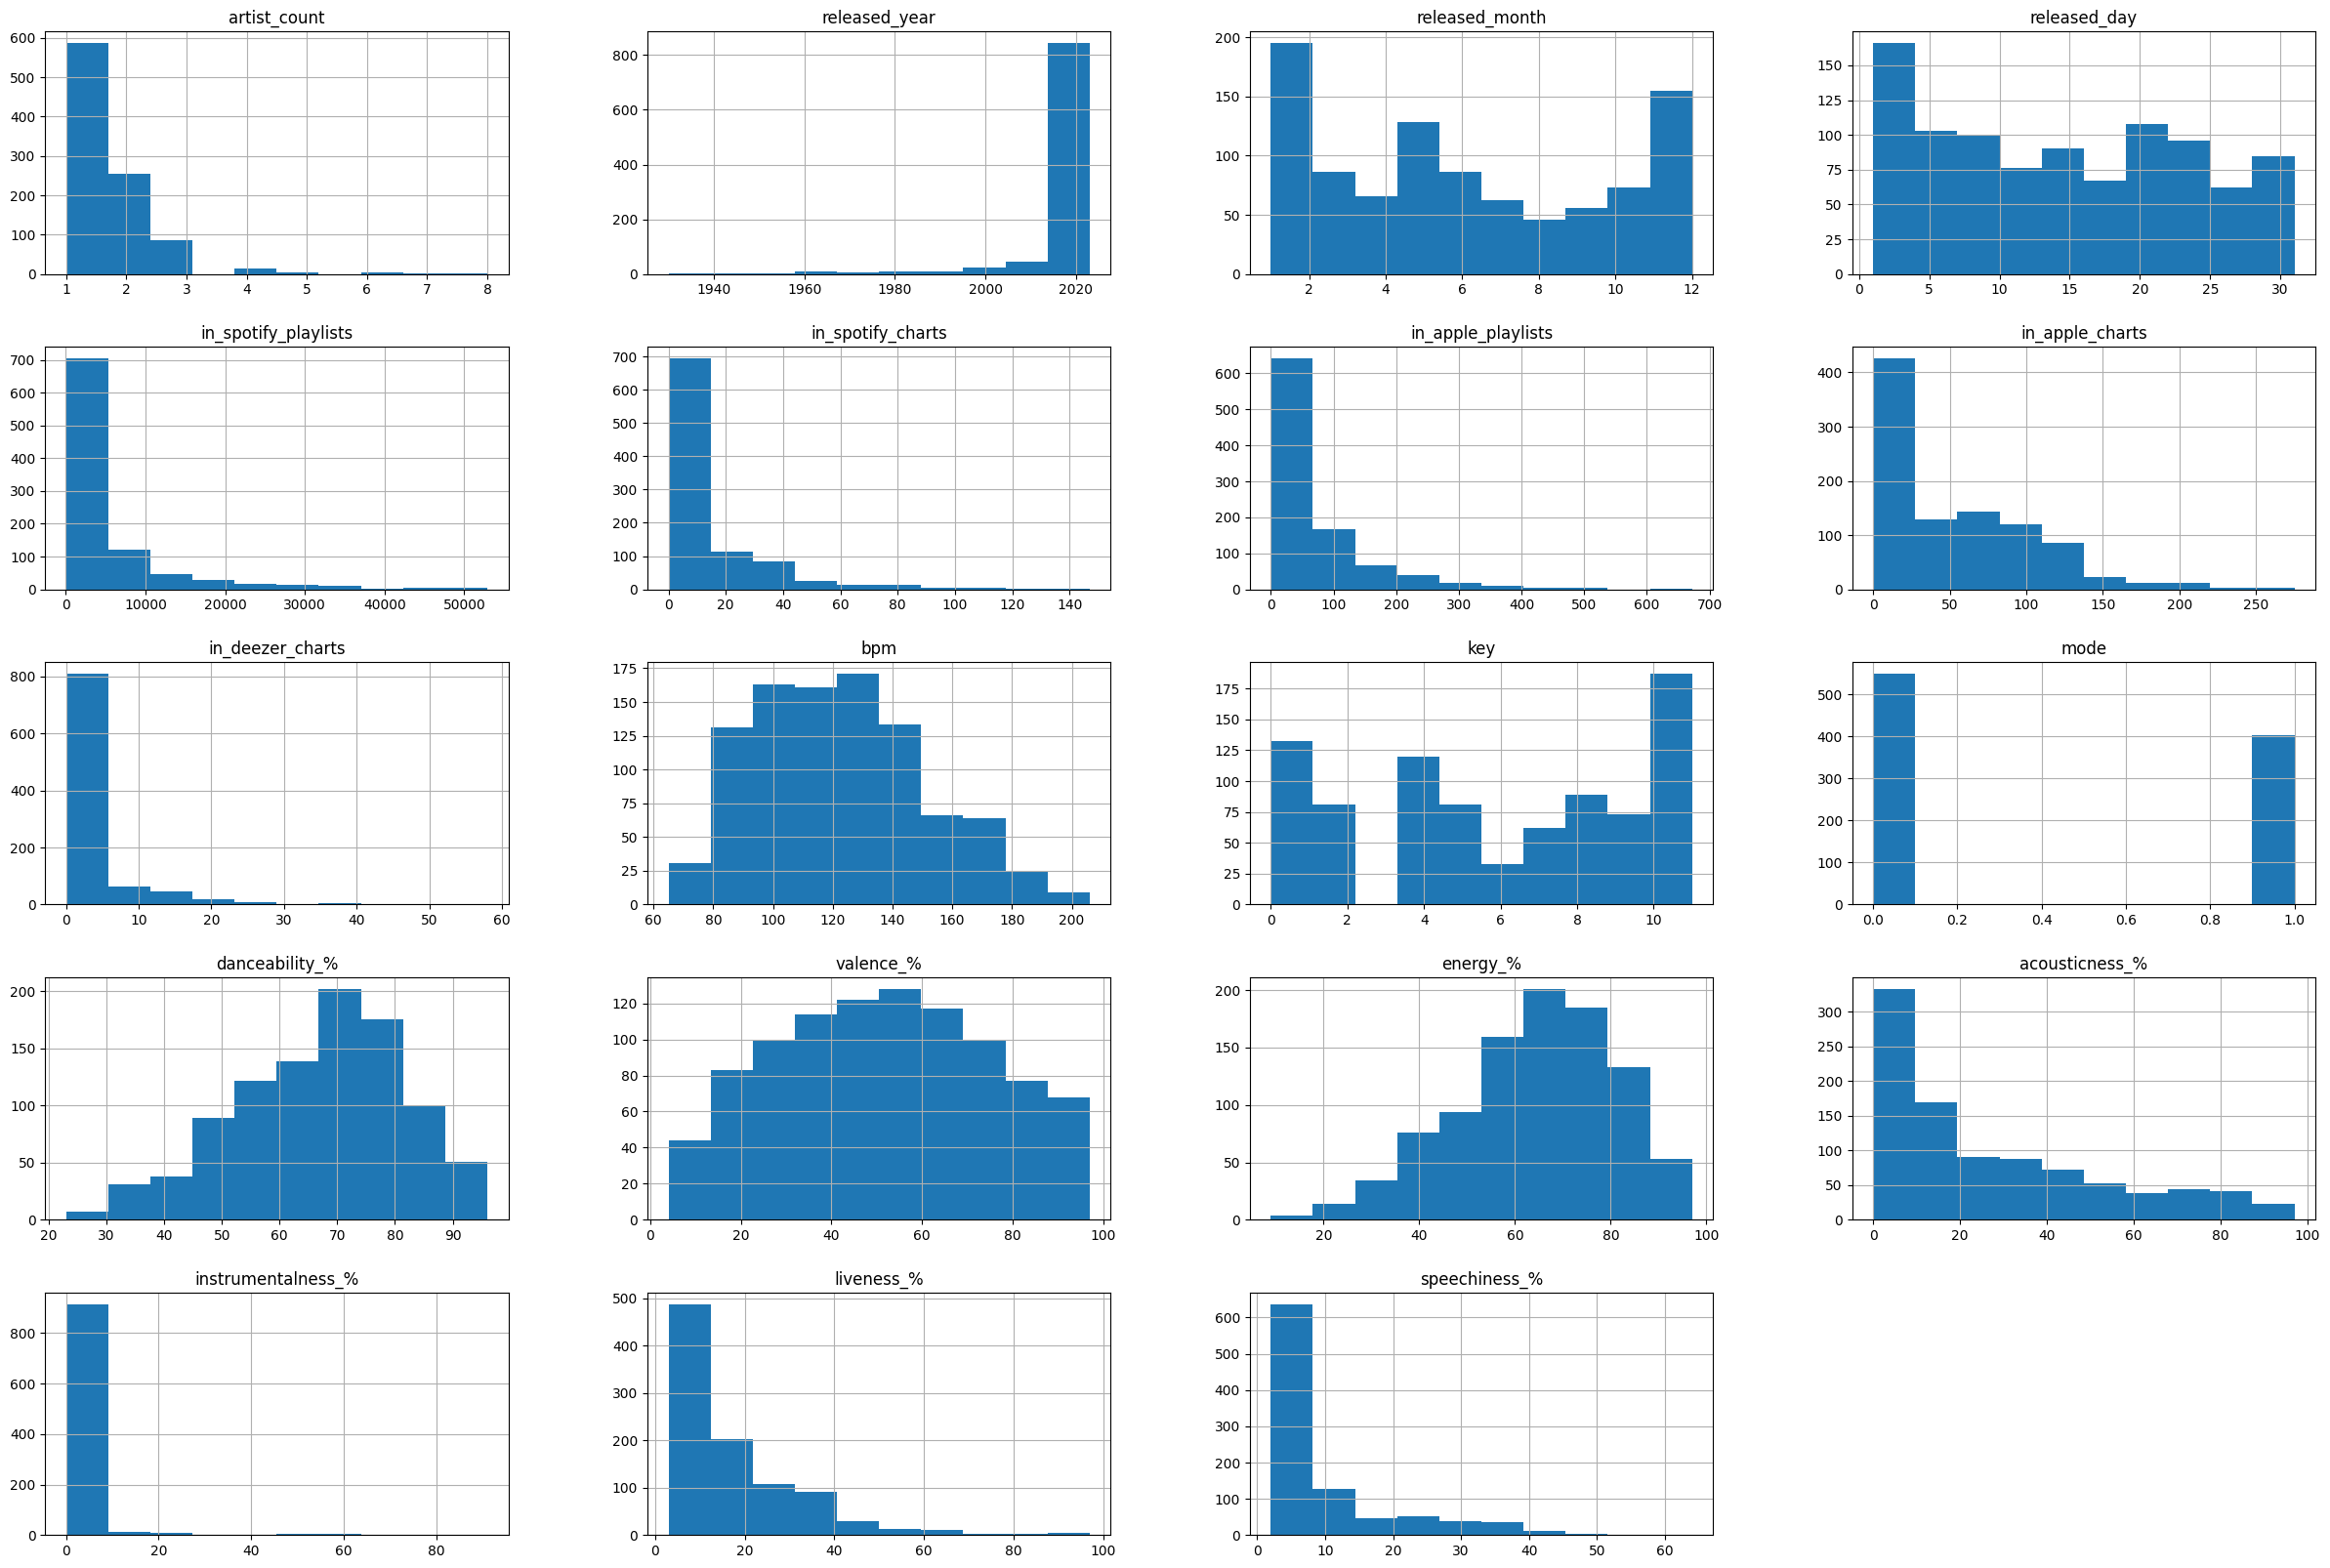

In [82]:
df.hist(figsize=(30,20))
plt.show()